# lec 07. learning-rate and evaluation

## 1. check result with different learning rate

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
x_data = np.array([[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]], dtype='float32')
y_data = np.array([[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]], dtype='float32')

# Evaluation our model using this test dataset
x_test = np.array([[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]], dtype='float32')
y_test = np.array([[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]], dtype='float32')

In [3]:
epochs = 501

for learning_rate in [1, 0.001, 0.00001]:

    rand_w = tf.random.normal(shape=(3, 3), seed=42, dtype='float32')
    rand_b = tf.random.normal(shape=(3,), seed=42, dtype='float32')

    W = tf.Variable(rand_w, dtype='float32')
    b = tf.Variable(rand_b, dtype='float32')

    hypothesis = lambda X, W, b: tf.matmul(X, W) + b
    loss = lambda Y, hypothesis: tf.nn.softmax_cross_entropy_with_logits(Y, hypothesis)

    print(f"==================== learning rate: {learning_rate} ====================")
    for i in range(epochs):
        with tf.GradientTape() as tape:
            # forward prop
            logits = hypothesis(x_data, W, b)
            losses = loss(y_data, logits)

            # get differentiations
            dl_dw, dl_db = tape.gradient(losses, [W, b])

            W.assign_sub(learning_rate * dl_dw)
            b.assign_sub(learning_rate * dl_db)

            if (i // 100 >= 1) and (i % 100 == 0):
                print("epoch: ", i, " costs: ", tf.reduce_sum(losses).numpy())

==================== learning rate: 1 ====================
epoch:  100  costs:  587.7707
epoch:  200  costs:  285.14865
epoch:  300  costs:  44.17435
epoch:  400  costs:  456.7936
epoch:  500  costs:  509.41208
==================== learning rate: 0.001 ====================
epoch:  100  costs:  12.502428
epoch:  200  costs:  11.04928
epoch:  300  costs:  9.803442
epoch:  400  costs:  8.770555
epoch:  500  costs:  7.951294
==================== learning rate: 1e-05 ====================
epoch:  100  costs:  47.904335
epoch:  200  costs:  45.66255
epoch:  300  costs:  43.445602
epoch:  400  costs:  41.26136
epoch:  500  costs:  39.120754


learning_rate가 1일 때는, cost가 수렴하지 않고, 적당할 때에는 작아지고, 너무 작을 때는 cost가 줄어들긴 하지만 그 폭이 매우 작음

## 2. minmax and non-minmax

### Not scaled - 발산함

In [4]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]], dtype='float32')

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

x_data.shape, y_data.shape

((8, 4), (8, 1))

In [5]:
epochs = 10
learning_rate = 0.001

rand_w = tf.random.normal(shape=(4,1), seed=42, dtype='float32')
rand_b = tf.random.normal(shape=(1,), seed=42, dtype='float32')

W = tf.Variable(rand_w, dtype='float32')
b = tf.Variable(rand_b, dtype='float32')

hypothesis = lambda X, W, b: tf.matmul(X, W) + b
loss = lambda Y, hypothesis: tf.reduce_sum(tf.square(Y - hypothesis))

for i in range(epochs):
    with tf.GradientTape() as tape:
        # forward prop
        y_pred = hypothesis(x_data, W, b)
        losses = loss(y_data, y_pred)

        # get differentiations
        dl_dw, dl_db = tape.gradient(losses, [W, b])

        W.assign_sub(learning_rate * dl_dw)
        b.assign_sub(learning_rate * dl_db)

        # if (i // 10 >= 1) and (i % 10 == 0):
        print("epoch: ", i, " costs: ", tf.reduce_sum(losses).numpy())

epoch:  0  costs:  44355520000000.0
epoch:  1  costs:  3.118884e+34
epoch:  2  costs:  inf
epoch:  3  costs:  inf
epoch:  4  costs:  inf
epoch:  5  costs:  nan
epoch:  6  costs:  nan
epoch:  7  costs:  nan
epoch:  8  costs:  nan
epoch:  9  costs:  nan


### min-max scaled - 수렴함

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)
x_scaled

array([[1.        , 1.        , 0.        , 1.        ],
       [0.7054825 , 0.7043953 , 1.        , 0.71881485],
       [0.5441246 , 0.5027466 , 0.57608694, 0.6064682 ],
       [0.33890152, 0.31367874, 0.10869569, 0.45988846],
       [0.5143585 , 0.4258232 , 0.3043478 , 0.5850487 ],
       [0.4955597 , 0.4258232 , 0.31521744, 0.4813118 ],
       [0.11436081, 0.        , 0.20652169, 0.22007751],
       [0.        , 0.07747269, 0.5326087 , 0.        ]], dtype=float32)

In [7]:
epochs = 1001
learning_rate = 0.05

rand_w = tf.random.normal(shape=(4,1), seed=42, dtype='float32')
rand_b = tf.random.normal(shape=(1,), seed=42, dtype='float32')

W = tf.Variable(rand_w, dtype='float32')
b = tf.Variable(rand_b, dtype='float32')

hypothesis = lambda X, W, b: tf.matmul(X, W) + b
loss = lambda Y, hypothesis: tf.reduce_sum(tf.square(Y - hypothesis))

for i in range(epochs):
    with tf.GradientTape() as tape:
        # forward prop
        y_pred = hypothesis(x_scaled, W, b)
        losses = loss(y_data, y_pred)

        # get differentiations
        dl_dw, dl_db = tape.gradient(losses, [W, b])

        W.assign_sub(learning_rate * dl_dw)
        b.assign_sub(learning_rate * dl_db)

        if (i // 100 >= 1) and (i % 100 == 0):
            print("epoch: ", i, " costs: ", tf.reduce_sum(losses).numpy())

epoch:  100  costs:  105.22159
epoch:  200  costs:  64.60994
epoch:  300  costs:  41.649174
epoch:  400  costs:  28.477316
epoch:  500  costs:  20.920792
epoch:  600  costs:  16.585428
epoch:  700  costs:  14.098073
epoch:  800  costs:  12.671328
epoch:  900  costs:  11.852391
epoch:  1000  costs:  11.382698


## 3. mnist example

In [8]:
from sklearn.datasets import load_digits

In [9]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
print(dataset['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [11]:
dataset['images'].shape

(1797, 8, 8)

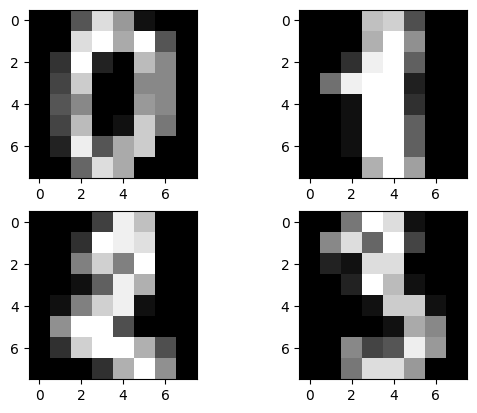

In [12]:
idx = 0
plt.subplot(221), plt.imshow(dataset['images'][idx], cmap='gray')
plt.subplot(222), plt.imshow(dataset['images'][idx+1], cmap='gray')
plt.subplot(223), plt.imshow(dataset['images'][idx+2], cmap='gray')
plt.subplot(224), plt.imshow(dataset['images'][idx+3], cmap='gray')
plt.show()

In [13]:
images = dataset['images'].reshape((dataset['images'].shape[0], 64)).astype('float32')
target = dataset['target'].astype('float32')

images.shape, target.shape

((1797, 64), (1797,))

In [14]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
target = ohe.fit_transform(np.expand_dims(target, axis=1)).toarray()
target.shape

(1797, 10)

In [15]:
learning_rate = 0.001

rand_w = tf.random.normal(shape=(64, 10), seed=42, dtype='float32')
rand_b = tf.random.normal(shape=(10,), seed=42, dtype='float32')

W = tf.Variable(rand_w, dtype='float32')
b = tf.Variable(rand_b, dtype='float32')

hypothesis = lambda X, W, b: tf.matmul(X, W) + b
loss = lambda Y, hypothesis: tf.nn.softmax_cross_entropy_with_logits(Y, hypothesis)

for i in range(epochs):
    with tf.GradientTape() as tape:
        # forward prop
        logits = hypothesis(images, W, b)
        losses = loss(target, logits)

        # get differentiations
        dl_dw, dl_db = tape.gradient(losses, [W, b])

        W.assign_sub(learning_rate * dl_dw)
        b.assign_sub(learning_rate * dl_db)

        if (i // 100 >= 1) and (i % 100 == 0):
            print("epoch: ", i, " costs: ", tf.reduce_sum(losses).numpy())

epoch:  100  costs:  2703.9707
epoch:  200  costs:  336.32135
epoch:  300  costs:  116.52537
epoch:  400  costs:  248.39671
epoch:  500  costs:  35.90378
epoch:  600  costs:  0.15654911
epoch:  700  costs:  0.09040513
epoch:  800  costs:  0.066011176
epoch:  900  costs:  0.052812383
epoch:  1000  costs:  0.04450065


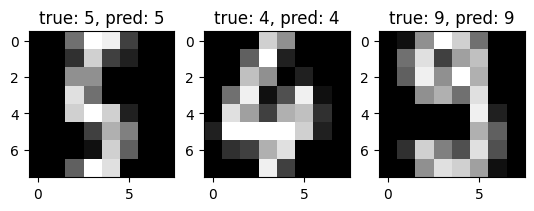

In [16]:
# sampling

for i in range(3):    
    rand_idx = np.random.randint(images.shape[0])
    logits = hypothesis(np.expand_dims(images[rand_idx], axis=0), W, b)
    true = np.argmax(target[rand_idx])
    pred = np.argmax(tf.nn.softmax(logits))
    
    plt.subplot(130+i+1)
    plt.imshow(images[rand_idx].reshape((8,8)), cmap='gray')
    plt.title(f"true: {true}, pred: {pred}")
plt.show()